   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 834.0/834.0 kB 13.5 MB/s eta 0:00:00
Removed no burn in


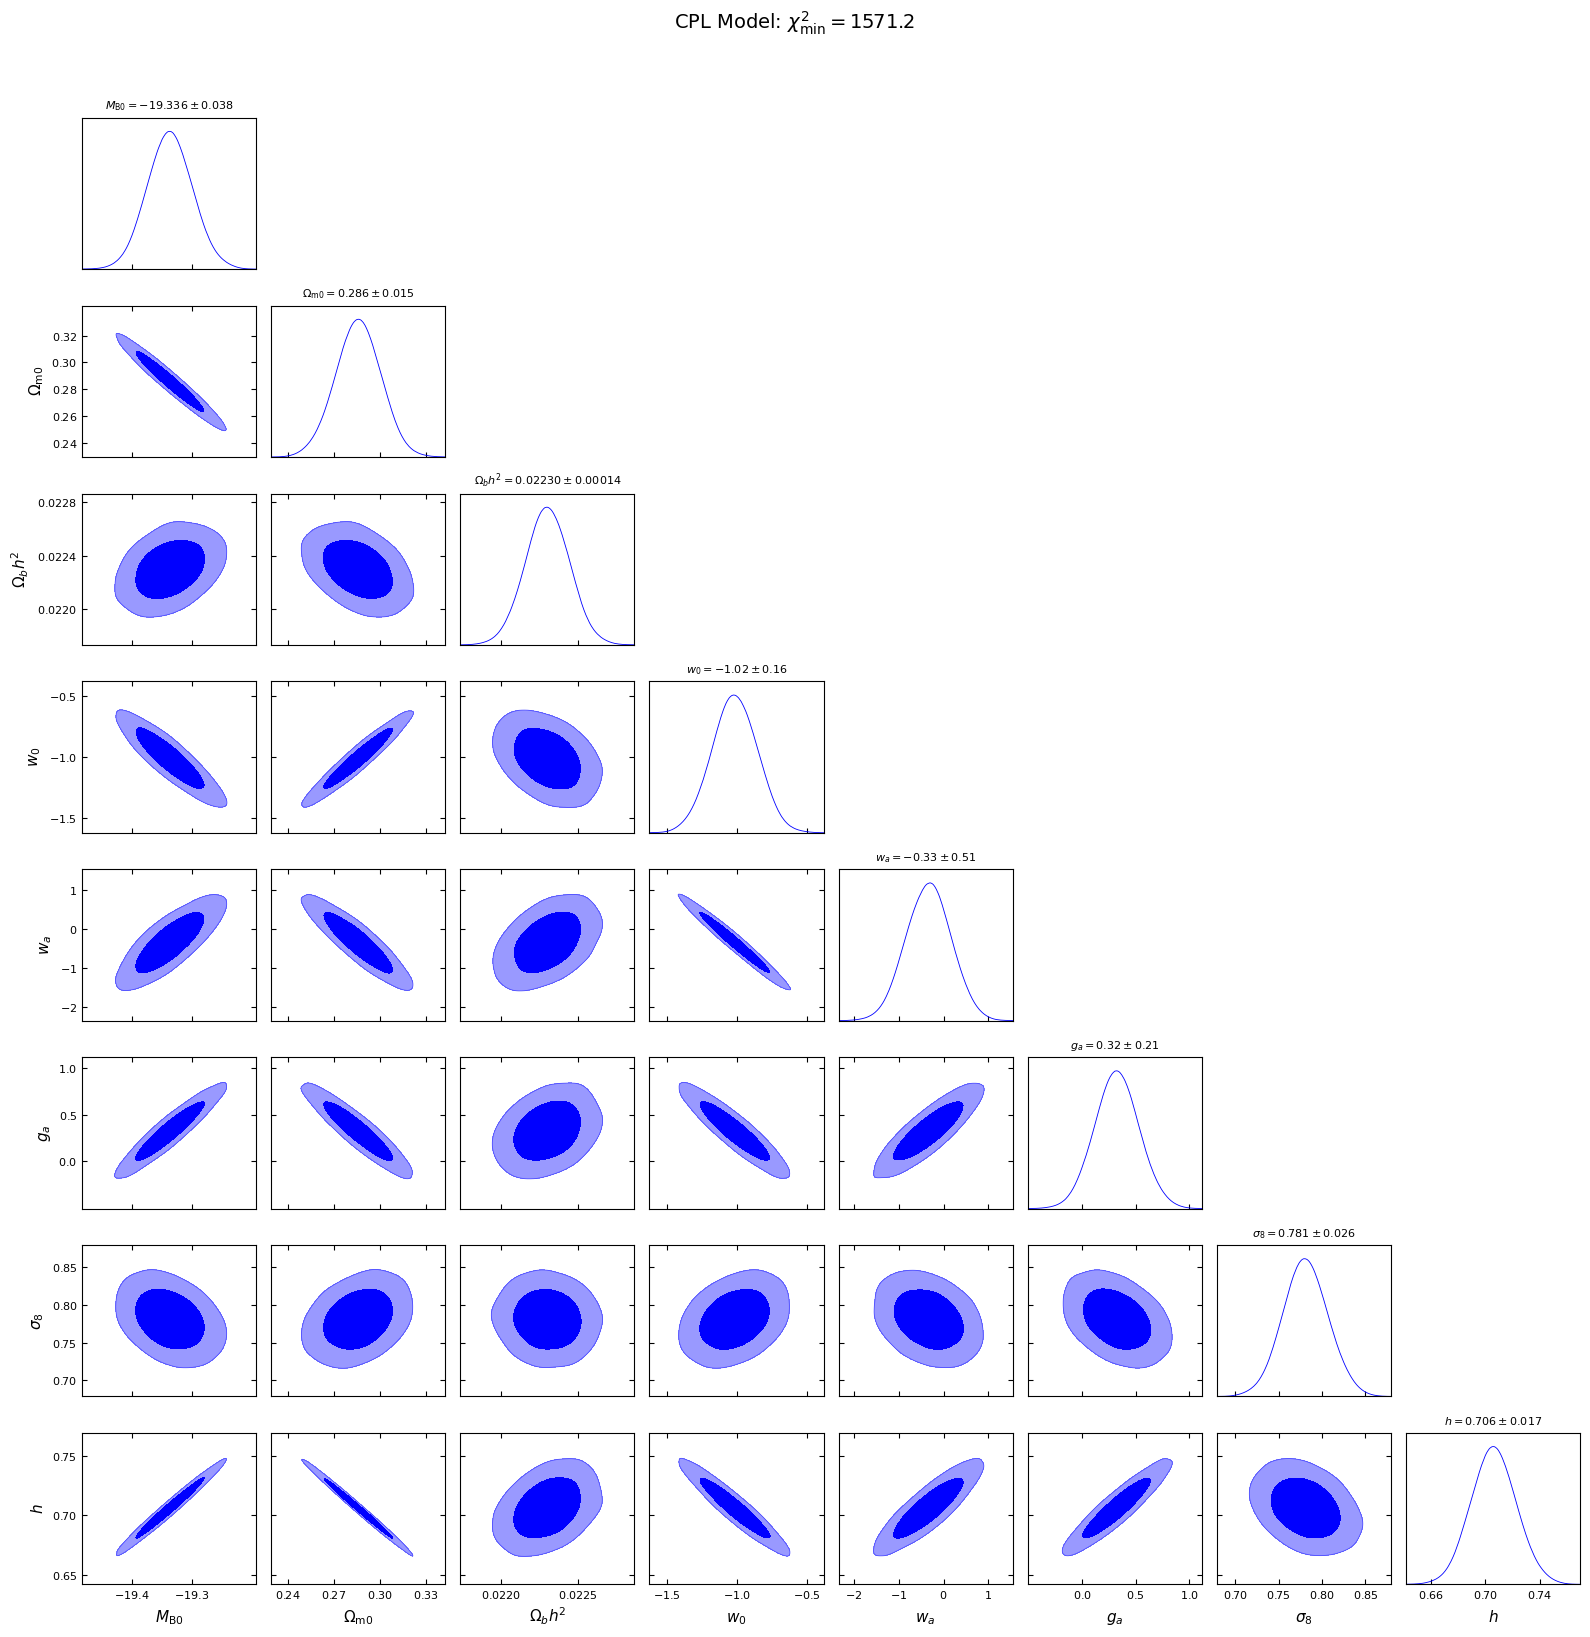

In [ ]:
# Install required package
!pip install getdist

import numpy as np
import matplotlib.pyplot as plt
from getdist import plots, MCSamples

# CPL best-fit parameters (from your table)
parameters = {
    "M_B0": {"mean": -19.337, "std": 0.038},
    "Omega_m0": {"mean": 0.286, "std": 0.015},
    "Omega_b_h2": {"mean": 0.0223, "std": 0.0002},
    "w_0": {"mean": -1.013, "std": 0.162},
    "w_a": {"mean": -0.342, "std": 0.504},
    "g_a": {"mean": 0.322, "std": 0.209},
    "sigma_8": {"mean": 0.781, "std": 0.027},
    "h": {"mean": 0.706, "std": 0.017}
}

# Parameter names for plotting (LaTeX formatted)
labels = [
    r"M_{\rm B0}",
    r"\Omega_{\rm m0}",
    r"\Omega_b h^2",
    r"w_0",
    r"w_a",
    r"g_a",
    r"\sigma_8",
    r"h"
]

# Covariance matrix from your Mathematica output (cij)
cov_matrix = np.array([
    [0.0014056675580696155, -0.0005332841225354594, 1.8521275178180638e-6, -0.005389974303118824, 0.014942814007903373, 0.007286794516326802, -0.00030201087853327414, 0.0006117441822332091],
    [-0.0005332841225354574, 0.00021563577364884832, -8.3042494647674e-7, 0.002268764009257184, -0.0066163880884816, -0.0028131356969429916, 0.00011137244377341255, -0.0002421040696288943],
    [1.8521275178180799e-6, -8.304249464767481e-7, 2.1370293312072047e-8, -8.976376254279479e-6, 0.00003268063778292224, 9.344433965853284e-6, -2.01054517492936e-7, 8.714767203952631e-7],
    [-0.00538997430311877, 0.002268764009257171, -8.97637625427931e-6, 0.02625163577030511, -0.07977779064985488, -0.030773160069217792, 0.0012809475794551316, -0.0025345498186849693],
    [0.01494281400790317, -0.006616388088481541, 0.000032680637782921845, -0.07977779064985466, 0.2538490024593983, 0.08945706233273451, -0.003598962988351996, 0.007215237785133192],
    [0.00728679451632676, -0.0028131356969429847, 9.344433965853213e-6, -0.030773160069217893, 0.08945706233273504, 0.04356011069107131, -0.0019155179759047156, 0.0031918650314715154],
    [-0.00030201087853327176, 0.00011137244377341202, -2.0105451749293055e-7, 0.0012809475794551338, -0.0035989629883520138, -0.0019155179759047128, 0.0007070242911459623, -0.0001305117942256722],
    [0.0006117441822332079, -0.0002421040696288947, 8.714767203952581e-7, -0.002534549818684986, 0.007215237785133266, 0.0031918650314715262, -0.00013051179422567287, 0.00027583180943903255]
])

# Generate correlated Gaussian samples
n_samples = 10000
means = [param["mean"] for param in parameters.values()]
samples = np.random.multivariate_normal(means, cov_matrix, size=n_samples)

# Create GetDist MCSamples object
mcsamples = MCSamples(
    samples=samples,
    names=[f"p{i}" for i in range(len(parameters))],
    labels=labels,
    label="CPL Model"
)

# Create the triangle plot
g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = False
g.settings.title_limit = 1
g.triangle_plot(
    [mcsamples],
    filled=True,
    contour_colors=["blue"],
    title_limit=1
)

# Add title with chi-squared
plt.suptitle(r"CPL Model: $\chi^2_{\rm min} = 1571.2$", fontsize=14, y=1.02)

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig("getdist_corner_plot_cpl.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

In [ ]:
print("Means:", means)
print("Covariance Matrix Shape:", cov_matrix.shape)
print("Covariance Matrix:\n", cov_matrix)

Means: [-19.337, 0.286, 0.0223, -1.013, -0.342, 0.322, 0.781, 0.706]
Covariance Matrix Shape: (8, 8)
Covariance Matrix:
 [[ 1.40566756e-03 -5.33284123e-04  1.85212752e-06 -5.38997430e-03
   1.49428140e-02  7.28679452e-03 -3.02010879e-04  6.11744182e-04]
 [-5.33284123e-04  2.15635774e-04 -8.30424946e-07  2.26876401e-03
  -6.61638809e-03 -2.81313570e-03  1.11372444e-04 -2.42104070e-04]
 [ 1.85212752e-06 -8.30424946e-07  2.13702933e-08 -8.97637625e-06
   3.26806378e-05  9.34443397e-06 -2.01054517e-07  8.71476720e-07]
 [-5.38997430e-03  2.26876401e-03 -8.97637625e-06  2.62516358e-02
  -7.97777906e-02 -3.07731601e-02  1.28094758e-03 -2.53454982e-03]
 [ 1.49428140e-02 -6.61638809e-03  3.26806378e-05 -7.97777906e-02
   2.53849002e-01  8.94570623e-02 -3.59896299e-03  7.21523779e-03]
 [ 7.28679452e-03 -2.81313570e-03  9.34443397e-06 -3.07731601e-02
   8.94570623e-02  4.35601107e-02 -1.91551798e-03  3.19186503e-03]
 [-3.02010879e-04  1.11372444e-04 -2.01054517e-07  1.28094758e-03
  -3.59896299e-